# VizieR: 2MASS

In [15]:
# generic imports for making a synth ccd image
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('dark_background')
import numpy as np
import scipy as sp
plt.rcParams['image.origin'] = 'lower' 
from astroquery.simbad import Simbad
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import astropy.units as u

In [2]:
Vizier = Vizier(timeout=3000)

In [3]:
Vizier.ROW_LIMIT = 3e5
rslt = Vizier.query_constraints(catalog="II/246", GLAT='<2 & >-2', Kmag='<7', GLON='<10 | >350')[0]
crds = coord.SkyCoord(rslt['RAJ2000'], rslt['DEJ2000'], frame='fk5', unit=(u.deg, u.deg)).galactic

Text(0.5, 1.0, 'Number of sources with K<7 per 20x20 arcminute region')

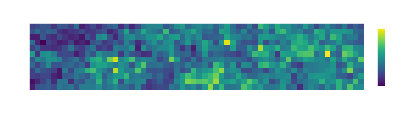

In [4]:
gridy,gridx = np.mgrid[-2:2:0.333, -10:10:0.333]
his,xe,ye = np.histogram2d(crds.galactic.l.wrap_at(180*u.deg).deg, crds.galactic.b.deg, bins=[gridx[0,:], gridy[:,0]])

fig = plt.figure(1)
fig.clf()
ax = fig.gca()
plt.imshow(his.T, extent=[xe.min(),xe.max(),ye.min(),ye.max()])
ax.set_aspect('equal') #gridx.shape[1]/gridx.shape[0])
cax = fig.add_axes([0.93, 0.4, 0.02, 0.2])
plt.colorbar(cax=cax)

ax.set_xlabel("Galactic Longitude")
ax.set_xlabel("Galactic Latitude")
ax.set_title("Number of sources with K<7 per 20x20 arcminute region")

In [6]:
v = Vizier(columns=['_RAJ2000', '_DEJ2000','*'], column_filters={"Kmag":"<7"})

In [7]:
reg_2mass = v.query_region(coord.SkyCoord(ra=261.931236, dec=-36.346729,
                                             unit=(u.deg, u.deg),
                                             frame='icrs'),
                         width="0d25m0s",
                         catalog="II/246")[0]
crds_2mass = coord.SkyCoord(reg_2mass['RAJ2000'], reg_2mass['DEJ2000'], frame='fk5', unit=(u.deg, u.deg)).galactic

Text(0.5, 1.0, 'Number of sources with K<7 per 25x25 arcminute region')

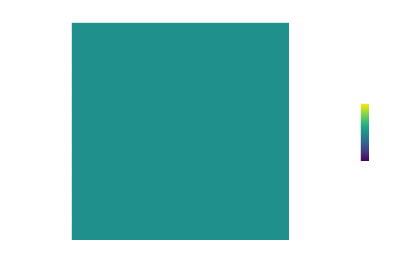

In [8]:
gridy,gridx = np.mgrid[-1.031:-.6143:0.41, -8.5235:-8.1068:0.41]
his,xe,ye = np.histogram2d(crds_2mass.galactic.l.wrap_at(180*u.deg).deg, crds_2mass.galactic.b.deg, bins=[gridx[0,:], gridy[:,0]])

fig = plt.figure(1)
fig.clf()
ax = fig.gca()
plt.imshow(his.T, extent=[xe.min(),xe.max(),ye.min(),ye.max()])
ax.set_aspect('equal') #gridx.shape[1]/gridx.shape[0])
cax = fig.add_axes([0.93, 0.4, 0.02, 0.2])
plt.colorbar(cax=cax)

ax.set_xlabel("Galactic Longitude")
ax.set_xlabel("Galactic Latitude")
ax.set_title("Number of sources with K<7 per 25x25 arcminute region")

# VizieR: VVV

In [9]:
rslt_vvv = Vizier.query_constraints(catalog=["II/337", "II/348"], GLAT='<2 & >-2', Kmag='<7', GLON='<10 | >350')[0]
crds_vvv = coord.SkyCoord(rslt_vvv['RAJ2000'], rslt_vvv['DEJ2000'], frame='fk5', unit=(u.deg, u.deg)).galactic

Text(0.5, 1.0, 'Number of sources with K<7 per 20x20 arcminute region')

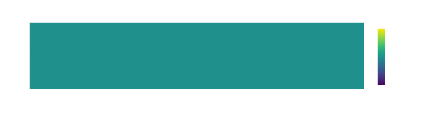

In [10]:
gridy,gridx = np.mgrid[-2:2:0.33, -10:10:0.333]
his,xe,ye = np.histogram2d(crds_vvv.galactic.l.wrap_at(180*u.deg).deg, crds_vvv.galactic.b.deg, bins=[gridx[0,:], gridy[:,0]])

fig = plt.figure(1)
fig.clf()
ax = figca()
plt.imshow(his.T, extent=[xe.min(),xe.max(),ye.min(),ye.max()])
ax.set_aspect('equal') #gridx.shape[1]/gridx.shape[0])
cax = fig.add_axes([0.93, 0.4, 0.02, 0.2])
plt.colorbar(cax=cax)

ax.set_xlabel("Galactic Longitude")
ax.set_xlabel("Galactic Latitude")
ax.set_title("Number of sources with K<7 per 20x20 arcminute region")

In [12]:
vvv = Vizier(columns=['_RAJ2000', '_DEJ2000','*'], column_filters={"Ksmag3":"<7"})

In [17]:
test = vvv.query_region(SkyCoord(2.5*u.deg, 0.1*u.deg, frame='galactic'), 
                           radius=12.5*u.arcmin, catalog=["II/337", "II/348"])[0]
testc = coord.SkyCoord(test['RAJ2000'], test['DEJ2000'], frame='fk5', unit=(u.deg, u.deg)).galactic

Text(0.5, 17.200000000000003, 'Galactic Latitude')

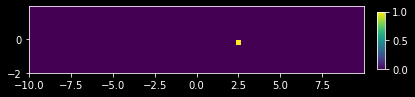

In [19]:
gridy,gridx = np.mgrid[-2:2:0.33, -10:10:0.333]
his,xe,ye = np.histogram2d(testc.galactic.l.wrap_at(180*u.deg).deg, testc.galactic.b.deg, bins=[gridx[0,:], gridy[:,0]])

fig = plt.figure(1)
fig.clf()
#ax = figca()
plt.imshow(his.T, extent=[xe.min(),xe.max(),ye.min(),ye.max()])
ax.set_aspect('equal') #gridx.shape[1]/gridx.shape[0])
cax = fig.add_axes([0.93, 0.4, 0.02, 0.2])
plt.colorbar(cax=cax)

ax.set_xlabel("Galactic Longitude")
ax.set_xlabel("Galactic Latitude")